# EDA

We have a robust dataset of recipe information: ratings, nutritional info, cook times, and recipe lengths. Our initial questions related to how and whether a recipe's rating is impacted by these other factors. But there are likely many relationship and nuances of our variables we can explore. There are also potentially features we don't have in this dataset that it would make sense to incorperate.

This section will be roughly broken into 3 parts:
- Understanding variables
- Cleaning your dataset
- Analyzing relationships between variables

In [1]:
import pandas as pd
import numpy as np
import os
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale, MinMaxScaler
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [2]:
data = pd.read_csv('data/cleaned.csv')

RecipeId         AuthorId     CookTime     PrepTime    TotalTime  \
count 269755.00000     269755.00000 269755.00000 269755.00000 269755.00000   
mean  219411.14282    6455305.93543      0.81506      0.45066      1.26670   
std   141441.27856  108621217.98579      2.17283      1.92960      2.92387   
min       38.00000         27.00000      0.00000      0.00000      0.01700   
25%    96092.50000      55882.00000      0.16700      0.16700      0.33300   
50%   203990.00000     171790.00000      0.33300      0.25000      0.66700   
75%   330369.00000     399367.00000      0.75000      0.33300      1.08300   
max   541298.00000 2002848998.00000     72.00000    168.00000     70.25000   

       RecipeIngredientParts  ReviewCount     Calories   FatContent  \
count           269755.00000 269755.00000 269755.00000 269755.00000   
mean                12.42712      5.28535    473.45800     23.82706   
std                  7.22760     20.56312   1138.78101     50.86614   
min                  0.00000      1.00000      0.00000      0.00000   
25%                  7.00000      1.00000    173.20000      5.60000   
50%                 11.00000      2.00000    312.40000     13.50000   
75%                 16.00000      4.00000    518.40000     26.90000   
max                 85.00000   3063.00000 434360.20000  11169.40000   

       SaturatedFatContent  CholesterolContent  SodiumContent  \
count         269755.00000        269755.00000   269755.00000   
mean               9.25723            84.46467      754.23159   
std               19.84420           177.17881     3654.60061   
min                0.00000             0.00000        0.00000   
25%                1.40000             4.20000      128.70000   
50%                4.60000            42.20000      361.60000   
75%               10.60000           106.20000      798.80000   
max             2079.00000         37224.00000   731056.40000   

       CarbohydrateContent  FiberContent  SugarContent  ProteinContent  \
count         269755.00000  269755.00000  269755.00000    269755.00000   
mean              48.25080       3.71771      21.32836        17.36006   
std              229.38739       7.17861     185.99733        28.43061   
min                0.00000       0.00000       0.00000         0.00000   
25%               12.70000       0.80000       2.40000         3.50000   
50%               27.80000       2.10000       6.30000         9.20000   
75%               50.00000       4.40000      17.20000        25.40000   
max           108294.60000    1748.60000   90682.30000      3276.20000   

       RecipeServings  RecipeInstructions         Year       Rating  
count    172482.00000        269755.00000 269755.00000 269755.00000  
mean          8.13311            97.26847   2006.34250      4.34608  
std          80.12754            73.21343      3.01248      0.98650  
min           1.00000             0.00000   1999.00000      0.00000  
25%           4.00000            50.00000   2004.00000      4.00000  
50%           6.00000            80.00000   2007.00000      4.69231  
75%           8.00000           124.00000   2008.00000      5.00000  
max       32767.00000          2315.00000   2020.00000      5.00000

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269755 entries, 0 to 269754
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   RecipeId               269755 non-null  int64  
 1   Name                   269755 non-null  object 
 2   AuthorId               269755 non-null  int64  
 3   CookTime               269755 non-null  float64
 4   PrepTime               269755 non-null  float64
 5   TotalTime              269755 non-null  float64
 6   DatePublished          269755 non-null  object 
 7   RecipeCategory         269512 non-null  object 
 8   RecipeIngredientParts  269755 non-null  int64  
 9   ReviewCount            269755 non-null  float64
 10  Calories               269755 non-null  float64
 11  FatContent             269755 non-null  float64
 12  SaturatedFatContent    269755 non-null  float64
 13  CholesterolContent     269755 non-null  float64
 14  SodiumContent          269755 non-nu

### Handling large datasets
Our dataset is increbily large and it might make our analysis computationally difficult. One way to narrow our scope without compromising quality is by limiting our analysis to a certain year range.

In [32]:
data.groupby('Year').count()

RecipeId   Name  AuthorId  CookTime  PrepTime  TotalTime  DatePublished  \
Year                                                                            
1999      1722   1722      1722      1722      1722       1722           1722   
2000      1011   1011      1011      1011      1011       1011           1011   
2001      6080   6080      6080      6080      6080       6080           6080   
2002     24991  24991     24991     24991     24991      24991          24991   
2003     22195  22195     22195     22195     22195      22195          22195   
2004     19369  19369     19369     19369     19369      19369          19369   
2005     27513  27513     27513     27513     27513      27513          27513   
2006     31292  31292     31292     31292     31292      31292          31292   
2007     39678  39678     39678     39678     39678      39678          39678   
2008     35547  35547     35547     35547     35547      35547          35547   
2009     25679  25679     25679     25679     25679      25679          25679   
2010     13539  13539     13539     13539     13539      13539          13539   
2011      8513   8513      8513      8513      8513       8513           8513   
2012      5783   5783      5783      5783      5783       5783           5783   
2013      4212   4212      4212      4212      4212       4212           4212   
2014      1199   1199      1199      1199      1199       1199           1199   
2015       372    372       372       372       372        372            372   
2016       259    259       259       259       259        259            259   
2017       333    333       333       333       333        333            333   
2018       307    307       307       307       307        307            307   
2019       131    131       131       131       131        131            131   
2020        30     30        30        30        30         30             30   

      RecipeCategory  RecipeIngredientParts  ReviewCount  ...  \
Year                                                      ...   
1999            1722                   1722         1722  ...   
2000            1011                   1011         1011  ...   
2001            6080                   6080         6080  ...   
2002           24991                  24991        24991  ...   
2003           22195                  22195        22195  ...   
2004           19354                  19369        19369  ...   
2005           27496                  27513        27513  ...   
2006           31253                  31292        31292  ...   
2007           39652                  39678        39678  ...   
2008           35487                  35547        35547  ...   
2009           25648                  25679        25679  ...   
2010           13511                  13539        13539  ...   
2011            8507                   8513         8513  ...   
2012            5777                   5783         5783  ...   
2013            4203                   4212         4212  ...   
2014            1198                   1199         1199  ...   
2015             369                    372          372  ...   
2016             259                    259          259  ...   
2017             333                    333          333  ...   
2018             307                    307          307  ...   
2019             130                    131          131  ...   
2020              29                     30           30  ...   

      CholesterolContent  SodiumContent  CarbohydrateContent  FiberContent  \
Year                                                                         
1999                1722           1722                 1722          1722   
2000                1011           1011                 1011          1011   
2001                6080           6080                 6080          6080   
2002               24991          24991                24991         24991   
2003               22195        

In [33]:
data[data.Year>2009].shape

(34678, 24)

Using data from the past 10 years may work better! Let's save this as a new dataframe.

In [34]:
recent = data[data.Year>2009]

## Variable Exploration

In [36]:
recent.describe()

RecipeId         AuthorId    CookTime    PrepTime   TotalTime  \
count  34678.00000      34678.00000 34678.00000 34678.00000 34678.00000   
mean  459146.66812   48580016.15292     0.74591     0.46301     1.20892   
std    34074.43479  299574395.23850     1.91082     1.95491     2.76531   
min   134437.00000       1533.00000     0.00000     0.00000     0.01700   
25%   428782.25000     226863.00000     0.16700     0.16700     0.33300   
50%   456792.50000     527607.00000     0.33300     0.25000     0.58300   
75%   484495.50000    1265596.25000     0.66700     0.33300     1.08300   
max   541298.00000 2002848998.00000    70.00000    50.58300    70.25000   

       RecipeIngredientParts  ReviewCount    Calories  FatContent  \
count            34678.00000  34678.00000 34678.00000 34678.00000   
mean                13.15459      2.51825   442.85780    22.34389   
std                  7.65167      8.15709   667.06480    42.07402   
min                  0.00000      1.00000     0.00000     0.00000   
25%                  8.00000      1.00000   171.70000     5.60000   
50%                 12.00000      1.00000   307.50000    13.30000   
75%                 17.00000      3.00000   504.25000    25.80000   
max                 76.00000   1256.00000 26604.40000  2252.10000   

       SaturatedFatContent  ...  SodiumContent  CarbohydrateContent  \
count          34678.00000  ...    34678.00000          34678.00000   
mean               8.34443  ...      759.21732             44.40760   
std               15.82708  ...     4710.50671             88.27212   
min                0.00000  ...        0.00000              0.00000   
25%                1.40000  ...      131.30000             12.10000   
50%                4.30000  ...      368.75000             27.40000   
75%                9.90000  ...      802.82500             49.30000   
max              464.00000  ...   704129.60000           4664.90000   

       FiberContent  SugarContent  ProteinContent  RecipeServings  \
count   34678.00000   34678.00000     34678.00000     23658.00000   
mean        3.91922      17.83593        16.93059         8.85075   
std         8.01467      57.65035        25.95846       213.23130   
min         0.00000       0.00000         0.00000         1.00000   
25%         0.90000       2.40000         3.50000         4.00000   
50%         2.30000       5.80000         9.20000         6.00000   
75%         4.70000      15.00000        24.60000         8.00000   
max       835.70000    3623.90000      1318.90000     32767.00000   

       RecipeInstructions        Year      Rating       score  
count         34678.00000 34678.00000 34678.00000 34678.00000  
mean            113.67703  2011.36083     4.34855     4.32923  
std              88.40151     1.63516     1.18143     1.20567  
min               0.00000  2010.00000     0.00000     0.00000  
25%              57.00000  2010.00000     4.00000     4.00000  
50%              93.00000  2011.00000     5.00000     5.00000  
75%             145.00000  2012.00000     5.00000     5.00000  
max            1735.00000  2020.00000     5.00000     5.00000  

[8 rows x 21 columns]

#### Outliers
Notice a few significant outliers for Calories and nutritional info. The std is way above the mean and all our values through the 75th percentile make more sense. Let's look at a few examples.

In [39]:
recent[recent.Calories>10000].describe()

RecipeId         AuthorId  CookTime  PrepTime  TotalTime  \
count     22.00000         22.00000  22.00000  22.00000   22.00000   
mean  490654.90909  537180247.50000   3.07127   4.01127    7.08259   
std    41352.93709  897812456.50276  10.07337  11.03429   14.53475   
min   414388.00000      33186.00000   0.00000   0.08300    0.08300   
25%   452400.50000     131483.00000   0.37525   0.33300    0.77075   
50%   504704.50000     687476.50000   0.54150   0.50000    1.07500   
75%   531717.00000 1350537646.50000   2.00000   1.68750    3.85450   
max   535853.00000 2002158537.00000  48.00000  48.00000   50.00000   

       RecipeIngredientParts  ReviewCount    Calories  FatContent  \
count               22.00000     22.00000    22.00000    22.00000   
mean                19.72727      5.95455 14023.77727   863.32727   
std                 13.29225     21.24568  4297.69423   502.36814   
min                  0.00000      1.00000 10060.80000    31.90000   
25%                 13.00000      1.00000 11085.67500   598.90000   
50%                 16.00000      1.00000 12353.50000   715.55000   
75%                 29.50000      1.75000 16498.57500  1122.02500   
max                 47.00000    101.00000 26604.40000  2252.10000   

       SaturatedFatContent  ...  SodiumContent  CarbohydrateContent  \
count             22.00000  ...       22.00000             22.00000   
mean             240.97727  ...    39473.65455           1349.20000   
std              125.45971  ...   148639.56854           1301.37011   
min               16.00000  ...       27.50000              0.00000   
25%              156.85000  ...     4314.70000            378.00000   
50%              237.15000  ...     6211.60000           1149.40000   
75%              358.57500  ...     9992.60000           1808.57500   
max              464.00000  ...   704129.60000           4664.90000   

       FiberContent  SugarContent  ProteinContent  RecipeServings  \
count      22.00000      22.00000        22.00000         7.00000   
mean       56.49545     839.13182       266.38182        15.85714   
std       107.88032    1035.31607       352.44134        37.15027   
min         0.00000       0.00000         0.00000         1.00000   
25%        12.25000      35.45000        90.20000         1.00000   
50%        23.85000     604.20000       127.30000         1.00000   
75%        48.97500    1191.02500       221.95000         3.50000   
max       519.50000    3623.90000      1318.90000       100.00000   

       RecipeInstructions       Year   Rating    score  
count            22.00000   22.00000 22.00000 22.00000  
mean            277.13636 2013.50000  3.90012  3.86364  
std             289.94389    3.01978  1.70803  1.75378  
min              26.00000 2010.00000  0.00000  0.00000  
25%              88.75000 2011.00000  3.00000  3.00000  
50%             199.50000 2013.00000  5.00000  5.00000  
75%             285.50000 2017.00000  5.00000  5.00000  
max            1309.00000 2018.00000  5.00000  5.00000  

[8 rows x 21 columns]

## Interpreting unlikely outliers
Our high calorie foods also contain nutrient values that seem impossible. We'll look at some of those rows with improbable values to determine if they were errors we should drop. It's very possible that some of our nutritional info represents the entire dish as opposed to one serving. We want our measurements to be as comparable as possible, so we'll aim to get rid of those larger values.

We can use domain knowledge, and exploring the recipes with high values for each nutient, to get a reasonable baseline for the upper tail for each nutrient a serving should have. 
- Recipes tend to be in servings of 1-8
- One dish is unlikely to have more than 1000 calories
The FDA reports the following as recommended food components an adult should eat per day:
- Fat: 78g
- Carbs: 275g
- Protein: 50g
- Sugar: 50g
- Cholesterol: 300mg 
- Sodium: 2300mg
- Fiber: 28mg

We'll make a copy of our dataframe with these criteria and compare it to our original one. We don't want to miss important information, but we also can't necessarily trust entries that have wildly incorrect nutrient data.

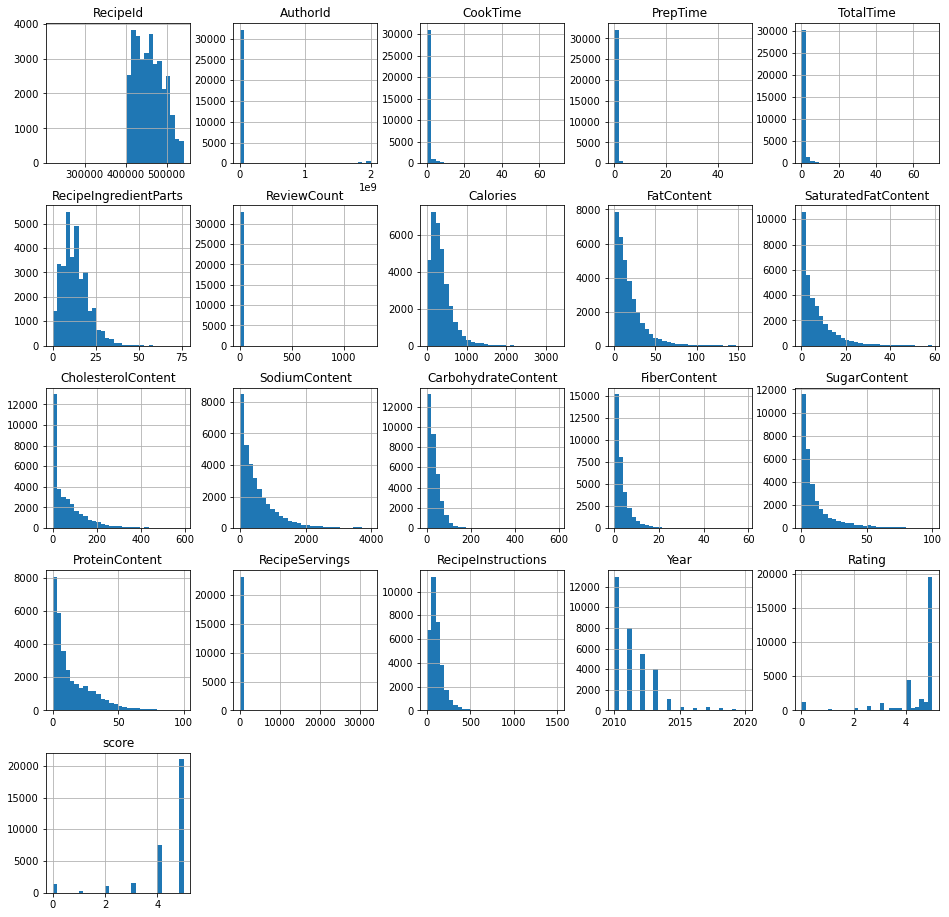

In [42]:
copy=recent.copy()
copy = copy[copy['FatContent']<160]
copy= copy[copy['SaturatedFatContent']<60]
copy=copy[copy['CholesterolContent']<600]
copy=copy[copy['CarbohydrateContent']<600] 
copy=copy[copy['SodiumContent']<4000] 
copy=copy[copy['FiberContent']<60]
copy=copy[copy['SugarContent']<100]
copy=copy[copy['ProteinContent']<100]
_=copy.hist(bins=30 ,figsize=(16,16))

## Understanding Variables

### Patterns in Ratings
We're tentatively most interested in reviews, so we'll look at the distribution of the range of our rating averages.
We can see the vast majority of reviews are 5 stars. We'll inspect some relationships to see what other factors might impact this.

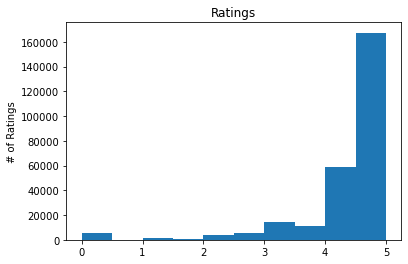

In [25]:
_=plt.hist(copy.Rating)
_=plt.ylabel('# of Ratings')
_=plt.title('Ratings')

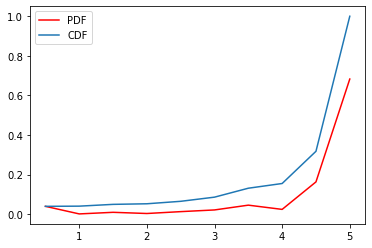

In [53]:
count, bins_count = np.histogram(copy.Rating, bins=10)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
_=plt.plot(bins_count[1:], pdf, color="red", label="PDF")
_=plt.plot(bins_count[1:], cdf, label="CDF")
_=plt.legend()

In [44]:
#Add a "score" column as well containing the rounded review score
copy['score'] = round(copy.Rating)
copy.groupby('score').mean()

RecipeId        AuthorId  CookTime  PrepTime  TotalTime  \
score                                                                 
0.00000 469971.63014 148919895.69863   0.89961   0.80330    1.70291   
1.00000 464691.18033 135345518.03607   0.91398   0.77992    1.69390   
2.00000 459863.29813  74962242.77103   0.79735   0.52540    1.32276   
3.00000 458867.73918  58973636.71384   0.86977   0.41619    1.28595   
4.00000 456052.89312  32089554.03637   0.75800   0.39652    1.15453   
5.00000 459104.21460  43119024.49396   0.70057   0.42425    1.12482   

         RecipeIngredientParts  ReviewCount  Calories  FatContent  \
score                                                               
0.00000               12.95662      1.11796 365.57740    18.25297   
1.00000               12.88852      1.55410 361.07443    17.84656   
2.00000               13.15327      2.49252 367.83458    18.32981   
3.00000               12.70952      4.32262 364.00692    17.97169   
4.00000               13.30166      3.15050 356.36140    17.31158   
5.00000               13.20190      2.26106 354.38734    18.12084   

         SaturatedFatContent  CholesterolContent  SodiumContent  \
score                                                             
0.00000              7.14901            70.27778      550.62169   
1.00000              6.53869            61.92852      531.71344   
2.00000              7.26561            69.83355      570.37103   
3.00000              6.64654            68.94598      551.60680   
4.00000              6.45173            66.97595      543.43759   
5.00000              6.64691            65.85273      537.17073   

         CarbohydrateContent  FiberContent  SugarContent  ProteinContent  \
score                                                                      
0.00000             36.60259       3.29117      12.28653        14.34285   
1.00000             37.43508       3.17836      14.11672        13.29607   
2.00000             36.66953       3.14308      12.75318        14.76897   
3.00000             35.73041       3.18980      12.30834        15.20389   
4.00000             34.56805       3.52588      10.61885        15.89387   
5.00000             33.27337       3.45066      11.06168        15.00672   

         RecipeServings  RecipeInstructions       Year  Rating  
score                                                           
0.00000         9.62500           132.30670 2012.07306 0.00983  
1.00000        12.87981           125.10820 2011.76393 1.00776  
2.00000        54.76231           127.81308 2011.48318 2.24500  
3.00000         8.43014           116.40977 2011.37763 3.06930  
4.00000         7.24778           109.78281 2011.19729 4.09560  
5.00000         7.32750           111.11213 2011.34299 4.97658

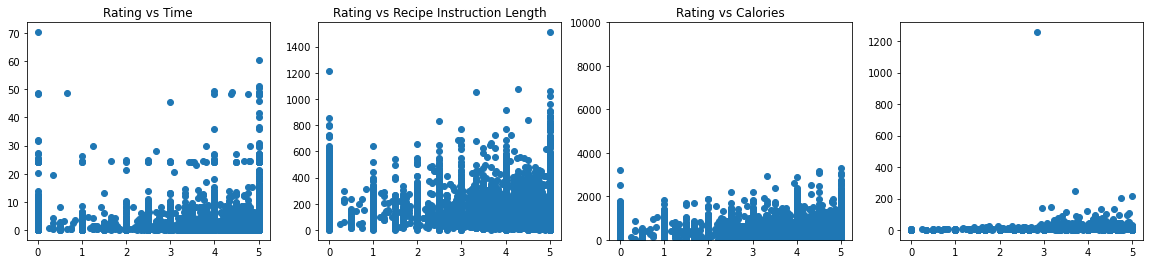

In [45]:
_=fig, ax = plt.subplots(1,4, figsize=(20,4))

_=ax[0].scatter(copy.Rating, copy.TotalTime)
_=ax[0].set_title("Rating vs Time")
#potentially linear with many outliers
_=ax[1].scatter(copy.Rating, copy.RecipeInstructions)
_=ax[1].set_title("Rating vs Recipe Instruction Length")
_=ax[2].scatter(copy.Rating, copy.Calories)
_=ax[2].set_title("Rating vs Calories")
_=ax[2].set_ylim(0,10000)
_=ax[3].scatter(copy.Rating, copy.ReviewCount)

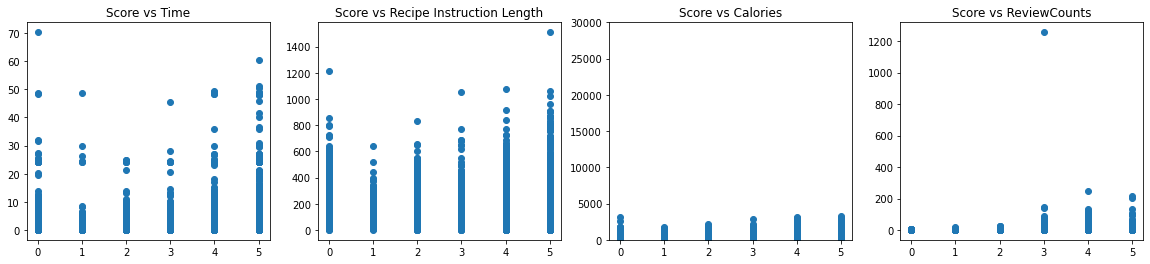

In [46]:
_=fig, ax = plt.subplots(1,4, figsize=(20,4))

_=ax[0].scatter(copy.score, copy.TotalTime)
_=ax[0].set_title("Score vs Time")
#potentially linear with many outliers
_=ax[1].scatter(copy.score, copy.RecipeInstructions)
_=ax[1].set_title("Score vs Recipe Instruction Length")
_=ax[2].scatter(copy.score, copy.Calories)
_=ax[2].set_title("Score vs Calories")
_=ax[2].set_ylim(0,30000)
_=ax[3].scatter(copy.score, copy.ReviewCount)
_=ax[3].set_title("Score vs ReviewCounts")

## Relationships between variables

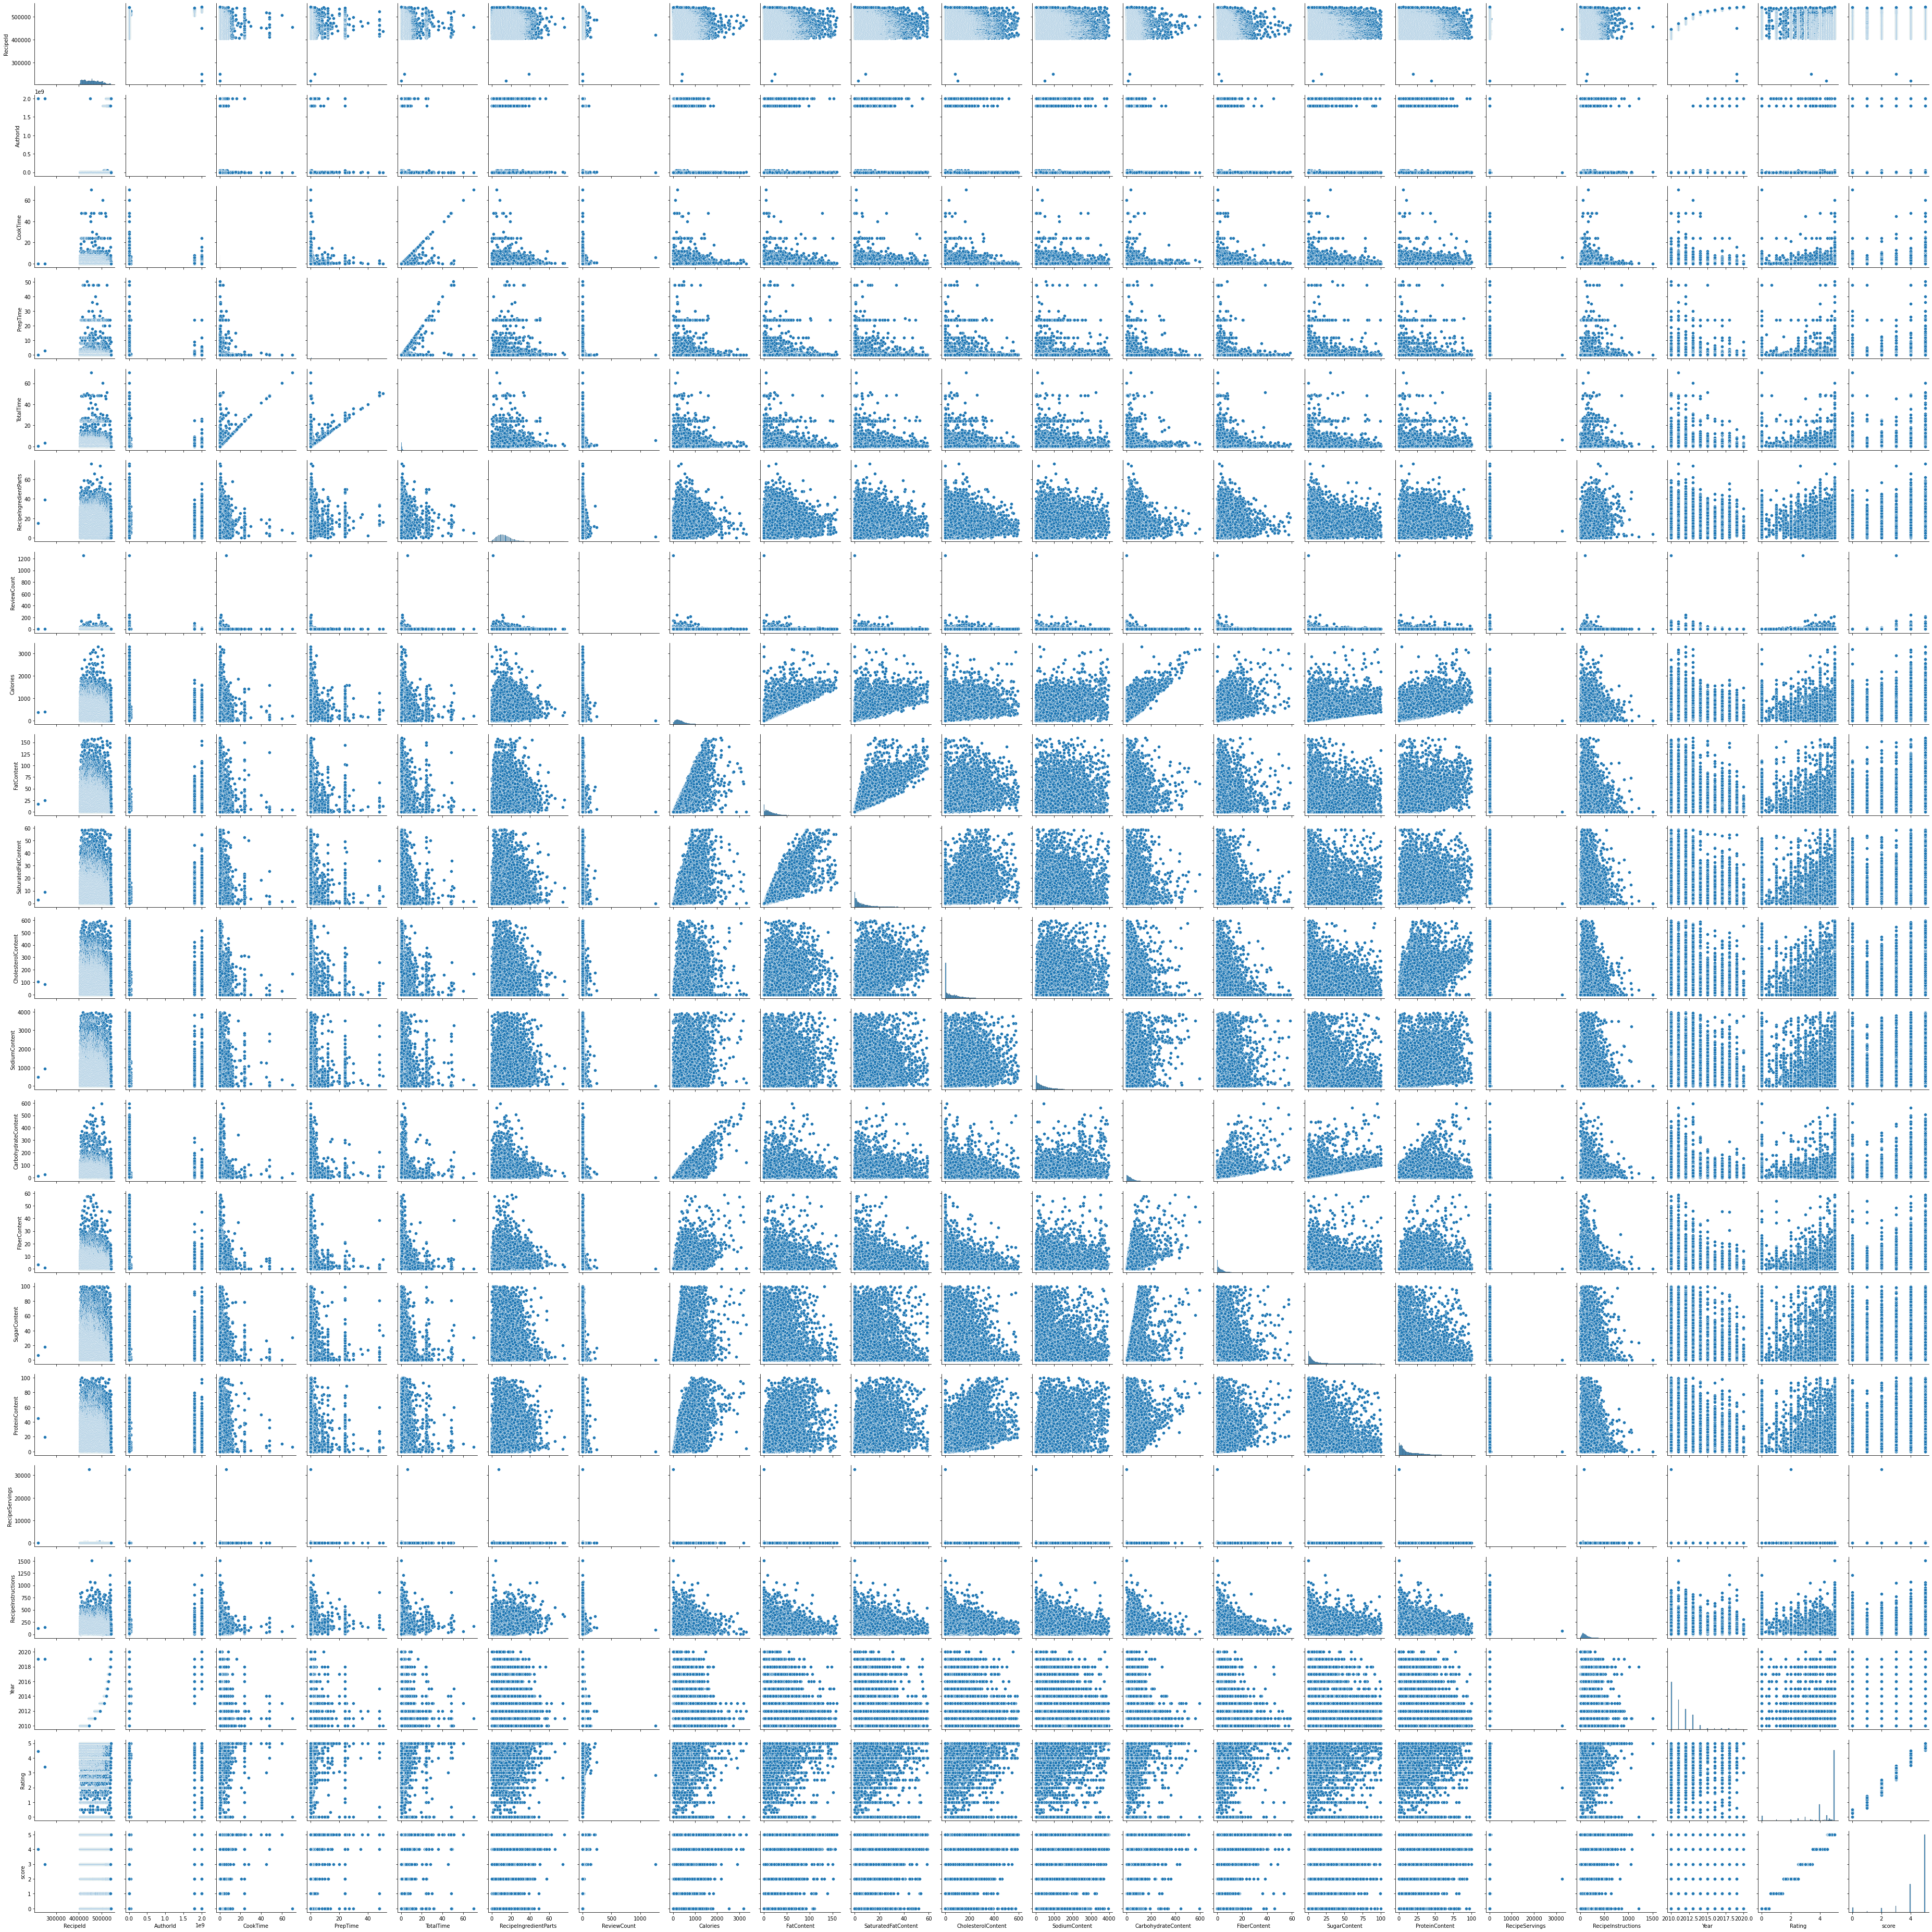

In [47]:
_=sns.pairplot(copy)

In [54]:
copy.groupby('score').mean()

RecipeId        AuthorId  CookTime  PrepTime  TotalTime  \
score                                                                 
0.00000 469971.63014 148919895.69863   0.89961   0.80330    1.70291   
1.00000 464691.18033 135345518.03607   0.91398   0.77992    1.69390   
2.00000 459863.29813  74962242.77103   0.79735   0.52540    1.32276   
3.00000 458867.73918  58973636.71384   0.86977   0.41619    1.28595   
4.00000 456052.89312  32089554.03637   0.75800   0.39652    1.15453   
5.00000 459104.21460  43119024.49396   0.70057   0.42425    1.12482   

         RecipeIngredientParts  ReviewCount  Calories  FatContent  \
score                                                               
0.00000               12.95662      1.11796 365.57740    18.25297   
1.00000               12.88852      1.55410 361.07443    17.84656   
2.00000               13.15327      2.49252 367.83458    18.32981   
3.00000               12.70952      4.32262 364.00692    17.97169   
4.00000               13.30166      3.15050 356.36140    17.31158   
5.00000               13.20190      2.26106 354.38734    18.12084   

         SaturatedFatContent  CholesterolContent  SodiumContent  \
score                                                             
0.00000              7.14901            70.27778      550.62169   
1.00000              6.53869            61.92852      531.71344   
2.00000              7.26561            69.83355      570.37103   
3.00000              6.64654            68.94598      551.60680   
4.00000              6.45173            66.97595      543.43759   
5.00000              6.64691            65.85273      537.17073   

         CarbohydrateContent  FiberContent  SugarContent  ProteinContent  \
score                                                                      
0.00000             36.60259       3.29117      12.28653        14.34285   
1.00000             37.43508       3.17836      14.11672        13.29607   
2.00000             36.66953       3.14308      12.75318        14.76897   
3.00000             35.73041       3.18980      12.30834        15.20389   
4.00000             34.56805       3.52588      10.61885        15.89387   
5.00000             33.27337       3.45066      11.06168        15.00672   

         RecipeServings  RecipeInstructions       Year  Rating  
score                                                           
0.00000         9.62500           132.30670 2012.07306 0.00983  
1.00000        12.87981           125.10820 2011.76393 1.00776  
2.00000        54.76231           127.81308 2011.48318 2.24500  
3.00000         8.43014           116.40977 2011.37763 3.06930  
4.00000         7.24778           109.78281 2011.19729 4.09560  
5.00000         7.32750           111.11213 2011.34299 4.97658

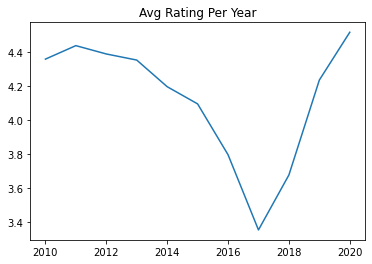

In [62]:
per_year = copy.groupby('Year')['Rating'].mean()
_=plt.plot(per_year)
_=plt.title("Avg Rating Per Year")

In [65]:
copy.reset_index(drop=True,inplace=True)

In [97]:
copy.groupby('AuthorId')['Rating']

In [96]:
author_rating = np.array(copy.groupby('AuthorId').size().sort_values(ascending=False))
np.quantile(author_rating, .99)

74.01000000000022

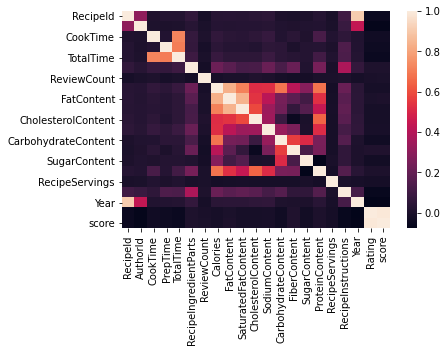

In [67]:
_=sns.heatmap(copy.corr())

### Adding Ratio Features

In [ ]:
data['FatRatio'] = data.FatContent / 78
data['SaturatedFatRatio'] = data.SaturatedFatContent/20
data['CholesterolRatio'] = data.CholesterolContent / 300
data['CarbRatio'] = data.CarbohydrateContent / 275
data['SodiumRatio'] = data.SodiumContent / 2300
data['FiberRatio'] = data.FiberContent / 28
data['SugarRatio'] = data.SugarContent / 50
data['ProteinRatio'] = data.ProteinContent / 50